In [1]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


['/job:localhost/replica:0/task:0/device:GPU:0']

In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Flatten()(x)
encoded = Dense(2, activation = 'relu')(x)

decoded = Dense(16, activation ='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
encoder = Model(input_img, encoded)

In [4]:
dat = 'hmnist_dat/hmnist_28_28_L.csv'

In [5]:
from numpy import genfromtxt
my_data = genfromtxt(dat, delimiter=',')

In [6]:
import pandas as pd
df = pd.read_csv(dat)

In [7]:
test_class = df.loc[df['label']==4]

In [8]:
test_class.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
3750,22,39,28,14,29,72,32,16,21,66,...,134,182,209,193,138,117,50,39,22,4
3751,136,102,124,179,123,102,123,108,138,196,...,36,77,114,85,69,75,60,76,146,4
3752,66,122,79,113,50,45,128,59,142,188,...,66,21,33,35,64,116,126,131,123,4
3753,162,127,32,22,43,77,43,28,36,66,...,42,60,136,158,27,51,63,40,85,4
3754,37,37,32,42,46,24,36,48,76,115,...,58,59,37,33,39,25,20,35,33,4


In [9]:
one_class = test_class.drop('label', axis = 1).values

In [10]:
my_data = one_class
one_class.shape

(625, 784)

In [11]:
#my_data = my_data[1:, :my_data.shape[1]-1]
my_data = my_data/255

In [12]:
my_data.shape
x_train = my_data

In [13]:
my_data.shape

(625, 784)

In [14]:
x_train.shape

(625, 784)

In [15]:
import numpy as np

In [16]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
epochs = 200

In [17]:
autoencoder.fit(x_train, my_data,
                epochs=epochs,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test),
               )

Epoch 1/200
625/625 [==============================] - 2s 3ms/step - loss: 0.6930
Epoch 2/200
625/625 [==============================] - 0s 141us/step - loss: 0.6926
Epoch 3/200
625/625 [==============================] - 0s 136us/step - loss: 0.6923
Epoch 4/200
625/625 [==============================] - 0s 133us/step - loss: 0.6919
Epoch 5/200
625/625 [==============================] - 0s 138us/step - loss: 0.6916
Epoch 6/200
625/625 [==============================] - 0s 138us/step - loss: 0.6912
Epoch 7/200
625/625 [==============================] - 0s 131us/step - loss: 0.6909
Epoch 8/200
625/625 [==============================] - 0s 137us/step - loss: 0.6905
Epoch 9/200
625/625 [==============================] - 0s 131us/step - loss: 0.6901
Epoch 10/200
625/625 [==============================] - 0s 136us/step - loss: 0.6897
Epoch 11/200
625/625 [==============================] - 0s 130us/step - loss: 0.6894
Epoch 12/200
625/625 [==============================] - 0s 131us/step - loss

625/625 [==============================] - 0s 134us/step - loss: 0.5855
Epoch 98/200
625/625 [==============================] - 0s 131us/step - loss: 0.5858
Epoch 99/200
625/625 [==============================] - 0s 131us/step - loss: 0.5859
Epoch 100/200
625/625 [==============================] - 0s 132us/step - loss: 0.5857
Epoch 101/200
625/625 [==============================] - 0s 130us/step - loss: 0.5855
Epoch 102/200
625/625 [==============================] - 0s 130us/step - loss: 0.5861
Epoch 103/200
625/625 [==============================] - 0s 148us/step - loss: 0.5859
Epoch 104/200
625/625 [==============================] - 0s 142us/step - loss: 0.5860
Epoch 105/200
625/625 [==============================] - 0s 139us/step - loss: 0.5861
Epoch 106/200
625/625 [==============================] - 0s 128us/step - loss: 0.5855
Epoch 107/200
625/625 [==============================] - 0s 126us/step - loss: 0.5855
Epoch 108/200
625/625 [==============================] - 0s 138us/step

625/625 [==============================] - 0s 119us/step - loss: 0.5854
Epoch 193/200
625/625 [==============================] - 0s 121us/step - loss: 0.5851
Epoch 194/200
625/625 [==============================] - 0s 126us/step - loss: 0.5850
Epoch 195/200
625/625 [==============================] - 0s 120us/step - loss: 0.5851
Epoch 196/200
625/625 [==============================] - 0s 126us/step - loss: 0.5850
Epoch 197/200
625/625 [==============================] - 0s 125us/step - loss: 0.5852
Epoch 198/200
625/625 [==============================] - 0s 121us/step - loss: 0.5854
Epoch 199/200
625/625 [==============================] - 0s 127us/step - loss: 0.5855
Epoch 200/200
625/625 [==============================] - 0s 122us/step - loss: 0.5853


In [18]:
x_test = x_train[4:14, :, :, :]

In [19]:
x_train.shape

(625, 28, 28, 1)

In [20]:
import matplotlib.pyplot as plt

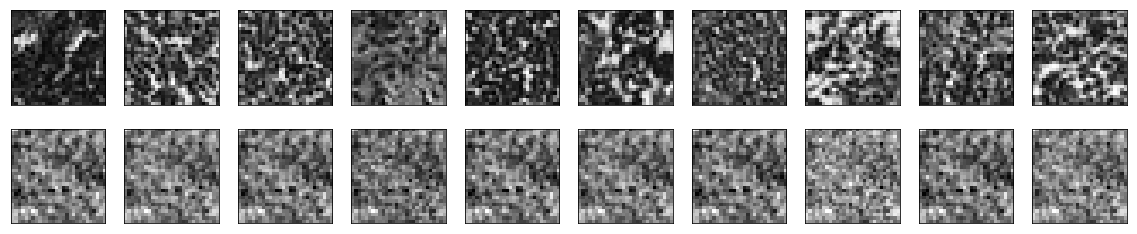

In [21]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
encoder = Model(input_img, encoded)

In [23]:
encodes = encoder.predict(x_train)

In [24]:
encodes.shape

(625, 2)

In [25]:
w = encodes

In [26]:
encodes

array([[9.41116   , 0.        ],
       [3.2423992 , 0.        ],
       [6.928132  , 0.04787613],
       ...,
       [6.7172675 , 0.        ],
       [6.8775754 , 0.19276632],
       [2.3722622 , 0.02885741]], dtype=float32)

In [27]:
from sklearn.decomposition import PCA

In [28]:
from sklearn.manifold import TSNE

In [29]:
pca_1 = PCA(n_components = 2)

In [30]:
plot_pcs = pca_1.fit_transform(w)

In [31]:
pc_df = pd.DataFrame(plot_pcs)
pc_df['label'] = df['label']

In [32]:
class_colors = ["C" + str(i) for i in df['label']]

In [33]:
plot_pcs.shape

(625, 2)

In [34]:
from mpl_toolkits.mplot3d import Axes3D

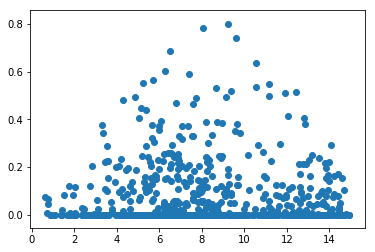

In [35]:
#% matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, )#projection = '3d')
ax.scatter(w[:, 0], w[:, 1])

In [36]:
tsne = TSNE(n_components = 3)

In [37]:
a_tsne = tsne.fit_transform(plot_pcs)

<IPython.core.display.Javascript object>


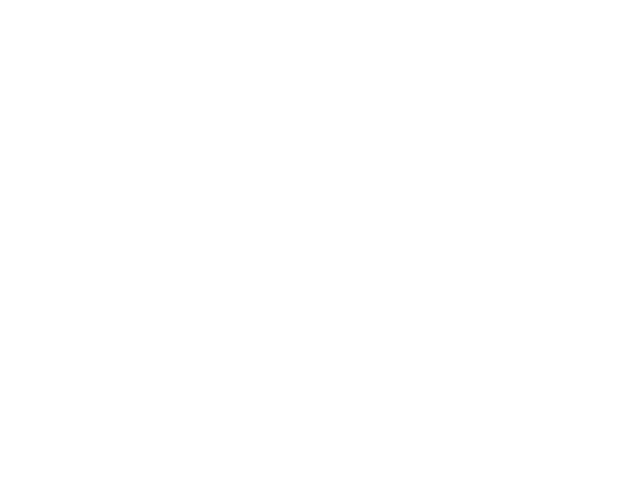

In [40]:
% matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a_tsne[:, 0], a_tsne[:, 1], a_tsne[:,2], c = class_colors)